# Imports

In [290]:
#Import Data Exploration Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

# Data Gathering

In [2]:
file = "../Data/Capstone_Data.csv"

In [3]:
oil_df = pd.read_csv(file)

In [4]:
oil_df.head()

,Year,Quarter,Canada_D,Europe_D,Japan_D,US_D,China_D,Soviet_D,Asia_D,Other_D,Total_World_D,Canada_S,Mexico_S,North_Sea_S,Other_S,US_S,China_S,Soviet_S,Other_S.1,OPEC_S,Total_World_S,OPEC_Crude_Oil_Portion,OPEC_Non_Crude_Portion,Total_OPEC,Brent_Crude_Price,Latin_America_Rigs,Europe_Rigs,Africa_Rigs,Middle_East_Rigs,Asia_Pacific_Rigs,Total_Intl_Rigs,Canada_Rigs,US_Rigs
0,2019,Q3,2.57,15.44,3.43,20.88,14.37,5.58,13.74,26.24,102.25,5.47,1.93,2.96,4.64,19.45,4.89,14.58,15.33,33.88,100.17,28.65,5.24,33.88,61.95,195,190,114,422,224,1144,132,920
1,2019,Q2,2.32,14.95,3.39,20.63,14.65,5.19,14.11,25.77,101.00,5.47,1.91,2.96,4.59,19.35,4.92,14.43,14.88,34.91,100.49,29.48,5.44,34.91,69.04,186,159,122,412,230,1109,83,989
2,2019,Q1,2.31,14.82,4.06,20.55,14.46,5.15,13.95,25.22,100.49,5.43,1.91,2.96,4.85,18.86,4.89,14.86,14.12,35.39,100.34,29.95,5.44,35.39,63.10,188,92,116,398,235,1030,186,1046
3,2018,Q4,2.58,14.93,3.89,20.75,14.10,5.36,13.82,25.29,100.73,5.62,1.95,2.95,4.89,19.03,4.81,14.88,14.49,36.74,102.42,31.42,5.32,36.74,68.76,193,90,106,397,225,1011,177,1072
4,2018,Q3,2.65,15.47,3.53,20.86,13.88,5.50,13.48,25.88,101.25,5.41,2.09,2.84,4.65,18.44,4.73,14.63,14.81,36.81,101.57,31.50,5.32,36.81,75.07,191,84,104,399,225,1003,208,1051


# Explore Data Set

In [5]:
oil_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    103 non-null    int64  
 1   Quarter                 103 non-null    object 
 2   Canada_D                103 non-null    float64
 3   Europe_D                103 non-null    float64
 4   Japan_D                 103 non-null    float64
 5   US_D                    103 non-null    float64
 6   China_D                 103 non-null    float64
 7   Soviet_D                103 non-null    float64
 8   Asia_D                  103 non-null    float64
 9   Other_D                 103 non-null    float64
 10  Total_World_D           103 non-null    float64
 11  Canada_S                103 non-null    float64
 12  Mexico_S                103 non-null    float64
 13  North_Sea_S             103 non-null    float64
 14  Other_S                 103 non-null    fl

In [6]:
oil_df.describe()

,Year,Canada_D,Europe_D,Japan_D,US_D,China_D,Soviet_D,Asia_D,Other_D,Total_World_D,Canada_S,Mexico_S,North_Sea_S,Other_S,US_S,China_S,Soviet_S,Other_S.1,OPEC_S,Total_World_S,OPEC_Crude_Oil_Portion,OPEC_Non_Crude_Portion,Total_OPEC,Brent_Crude_Price,Latin_America_Rigs,Europe_Rigs,Africa_Rigs,Middle_East_Rigs,Asia_Pacific_Rigs,Total_Intl_Rigs,Canada_Rigs,US_Rigs
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.00000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,2006.378641,2.209515,15.511359,4.922330,19.708738,7.89000,4.320485,9.361650,20.525728,84.446990,3.472913,3.136505,4.648738,2.436214,10.820583,3.986214,11.256214,11.658155,33.821650,84.453495,29.471748,4.350971,33.821650,53.548835,293.019417,99.737864,75.271845,259.854369,207.737864,935.737864,306.669903,1190.038835
std,7.470355,0.221613,0.759512,0.777944,0.918108,3.57459,0.482691,2.472779,3.671843,9.478345,0.883869,0.512389,1.361103,1.390549,3.050705,0.679246,2.783294,1.918736,2.817496,9.402470,1.750876,1.272196,2.817496,33.082288,79.903003,22.631733,24.813498,98.253514,37.689381,201.976166,138.513989,448.980303
min,1994.000000,1.700000,13.750000,3.390000,17.780000,3.03000,3.390000,5.310000,14.620000,67.170000,2.270000,1.910000,2.710000,1.430000,7.740000,2.930000,7.010000,8.030000,28.150000,68.070000,25.700000,1.810000,28.150000,11.210000,180.000000,61.000000,37.000000,112.000000,129.000000,565.000000,49.000000,421.000000
25%,2000.000000,2.040000,14.930000,4.325000,19.005000,4.72000,3.950000,7.320000,17.380000,76.790000,2.750000,2.915000,3.170000,1.565000,8.845000,3.380000,8.140000,10.090000,31.330000,76.540000,28.035000,3.255000,31.330000,24.545000,222.500000,82.500000,57.000000,168.500000,178.500000,763.000000,189.500000,832.000000
50%,2006.000000,2.250000,15.580000,4.960000,19.650000,7.28000,4.230000,9.000000,20.100000,84.720000,3.290000,3.180000,4.720000,1.650000,9.390000,3.880000,12.450000,12.120000,34.510000,84.430000,29.860000,4.230000,34.510000,49.550000,280.000000,94.000000,68.000000,250.000000,211.000000,936.000000,291.000000,1046.000000
75%,2013.000000,2.385000,16.150000,5.435000,20.360000,10.86000,4.695000,11.535000,24.530000,91.635000,4.010000,3.550000,6.010000,4.335000,11.910000,4.745000,13.705000,12.725000,36.450000,90.985000,30.935000,5.315000,36.450000,74.660000,356.000000,112.000000,84.500000,375.500000,241.000000,1089.000000,406.000000,1701.500000
max,2019.000000,2.650000,16.750000,6.430000,21.310000,14.65000,5.580000,14.110000,26.240000,102.250000,5.620000,3.900000,6.670000,5.090000,19.450000,5.210000,14.880000,15.330000,37.720000,102.420000,32.210000,6.560000,37.720000,121.200000,438.000000,190.000000,142.000000,422.000000,277.000000,1348.000000,665.000000,2010.000000


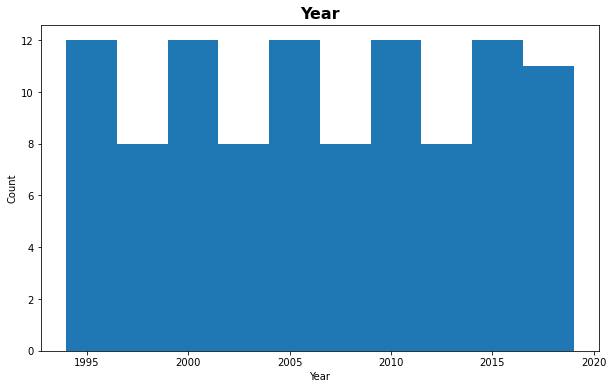

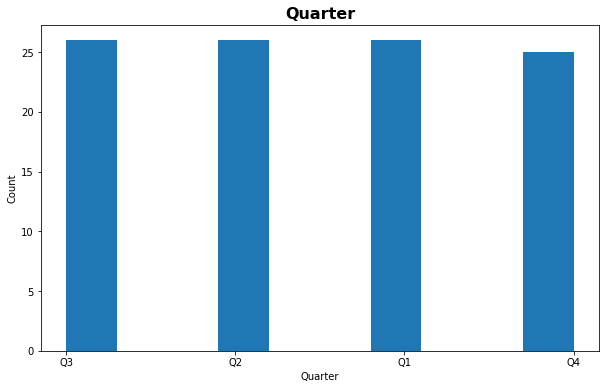

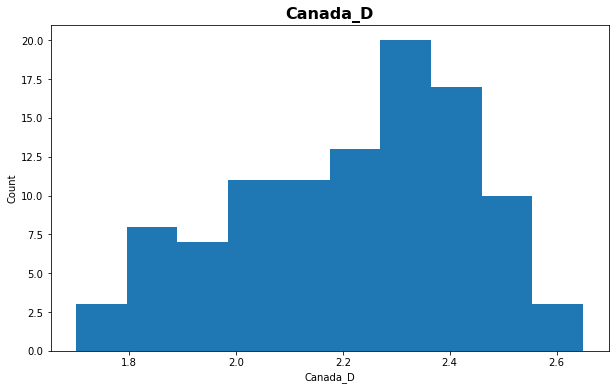

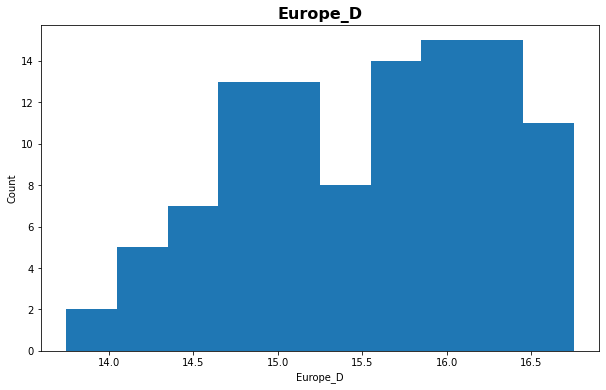

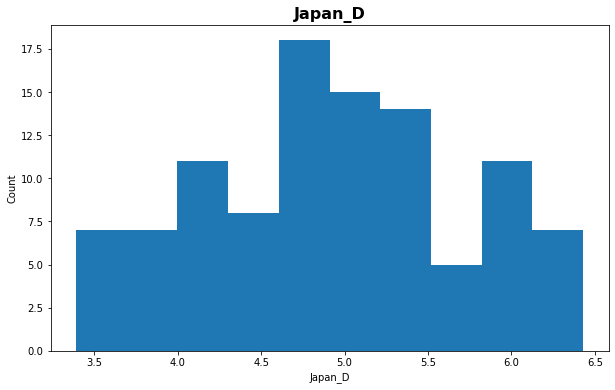

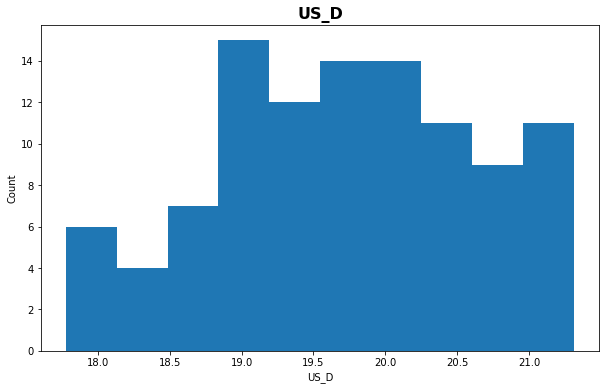

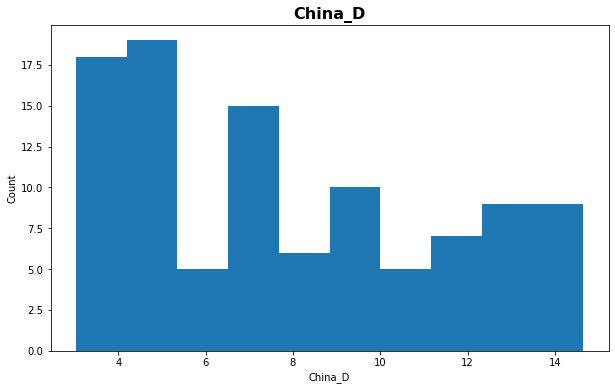

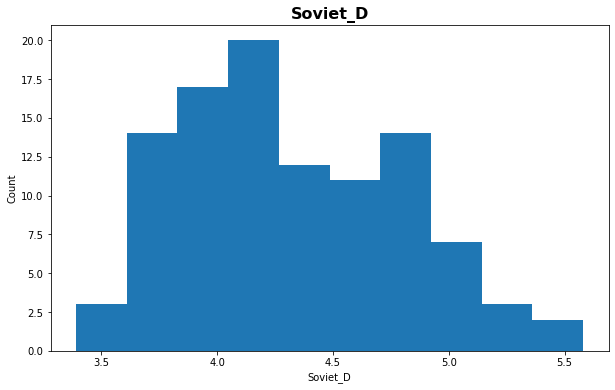

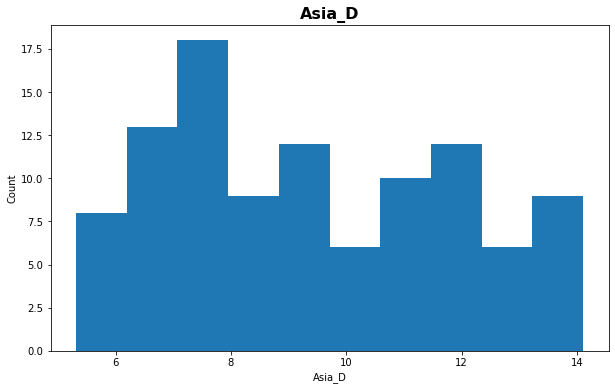

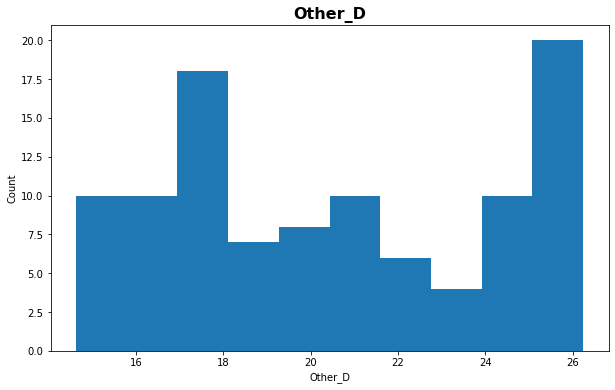

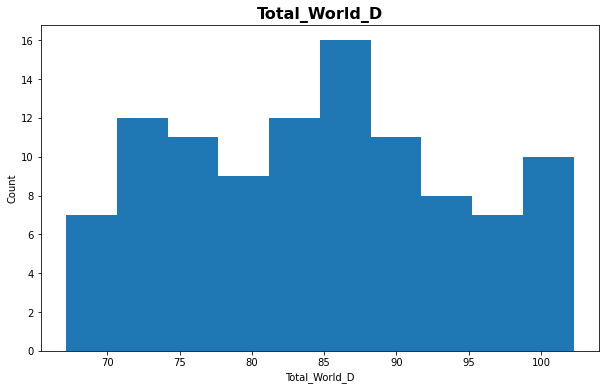

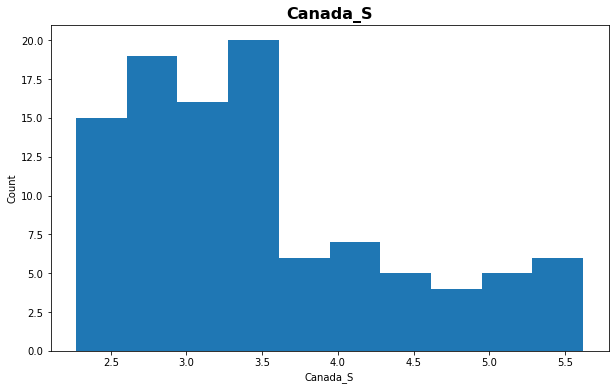

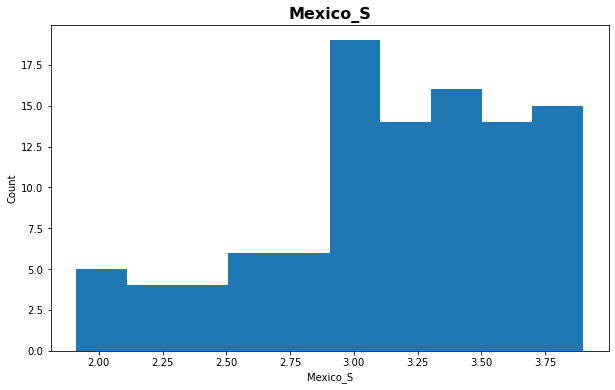

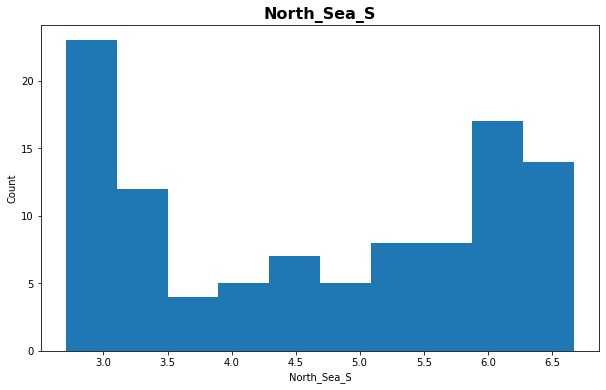

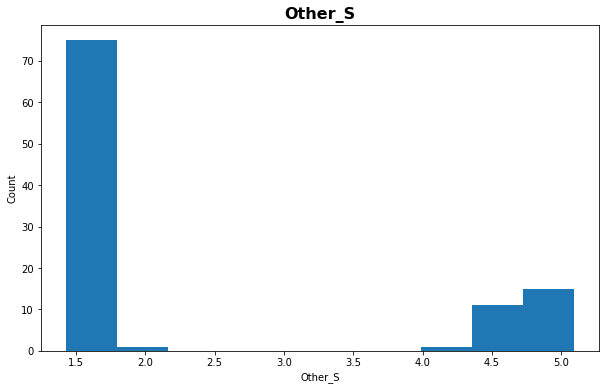

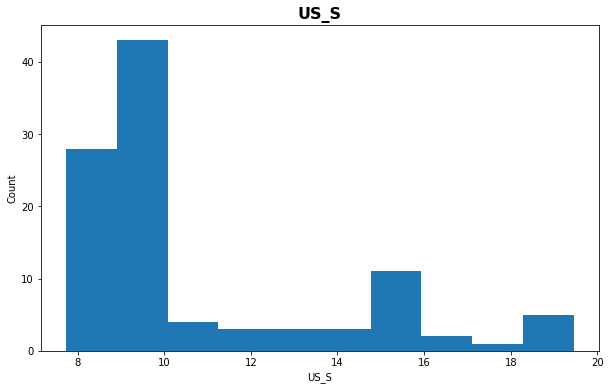

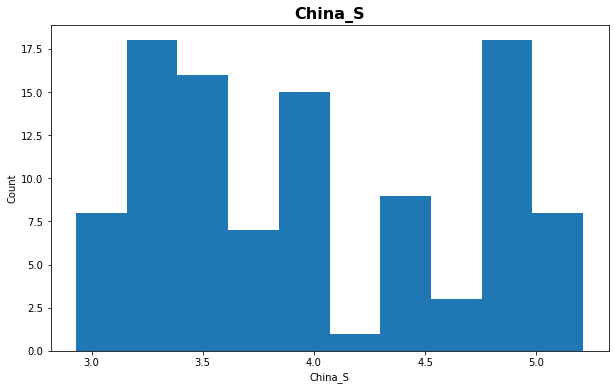

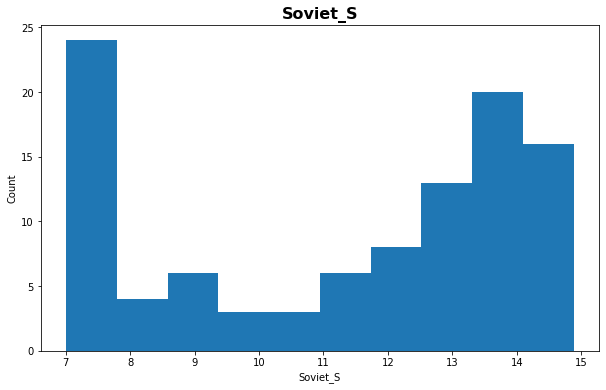

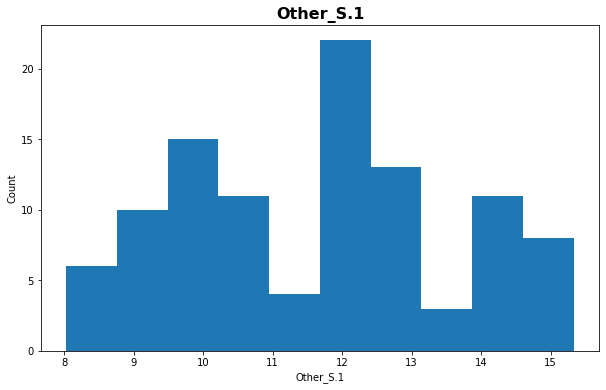

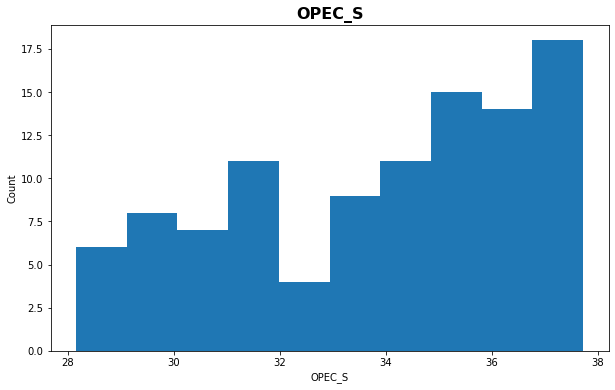

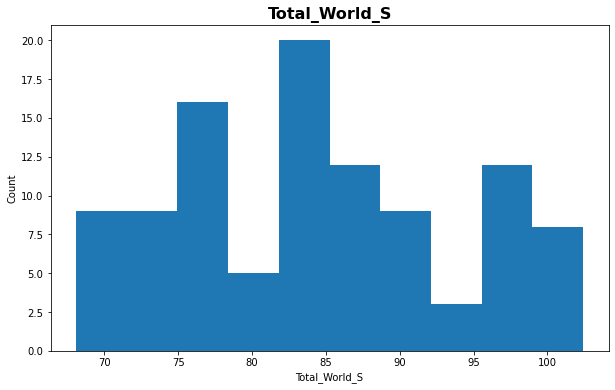

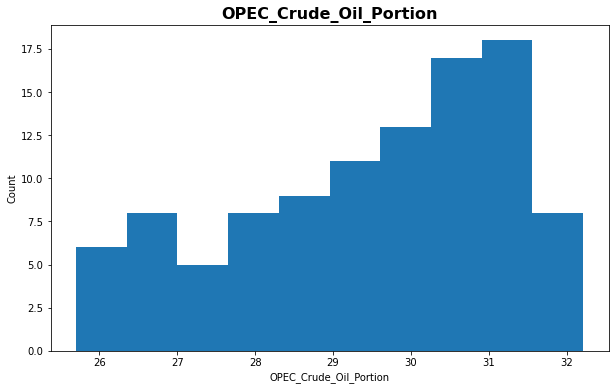

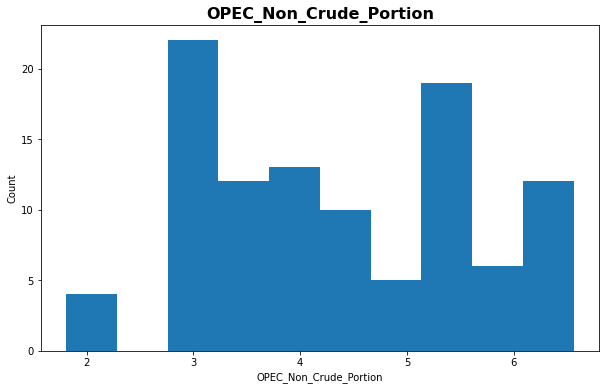

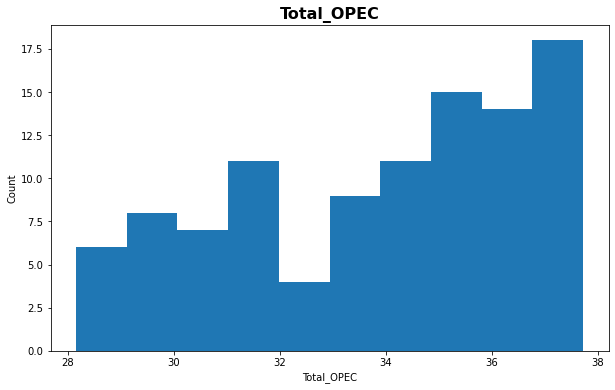

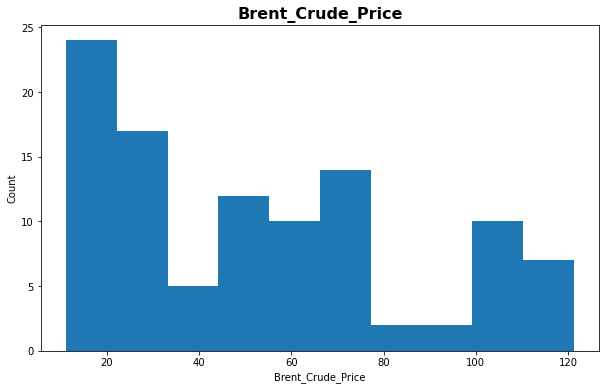

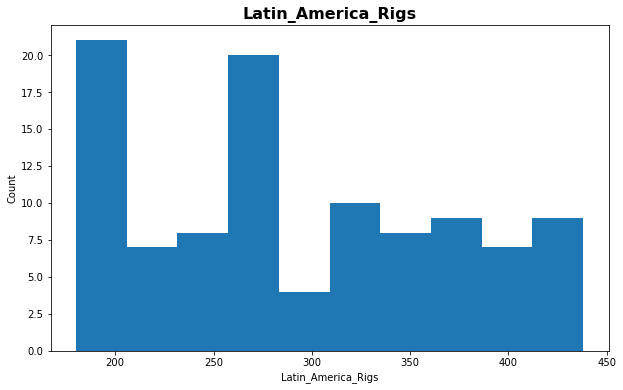

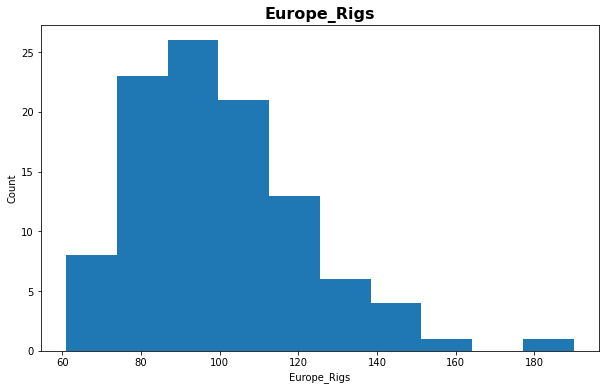

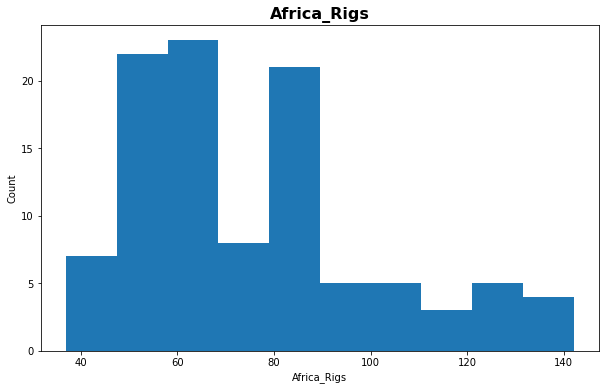

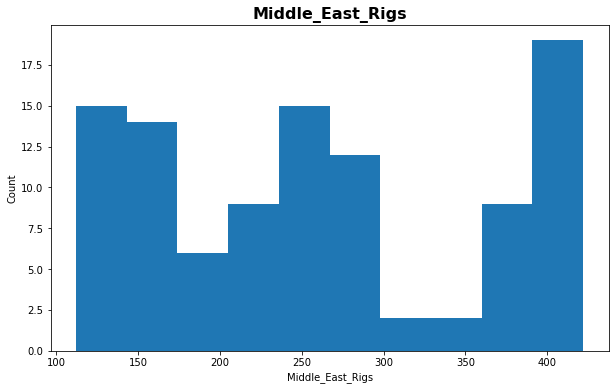

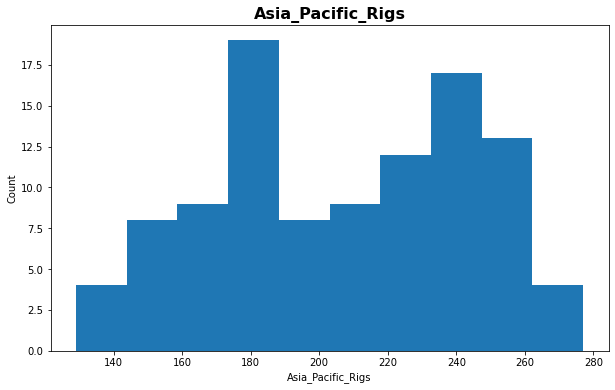

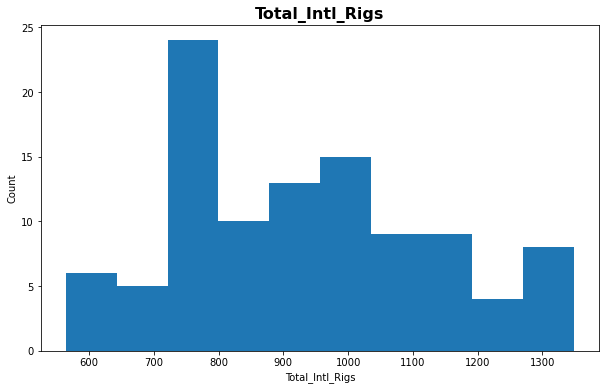

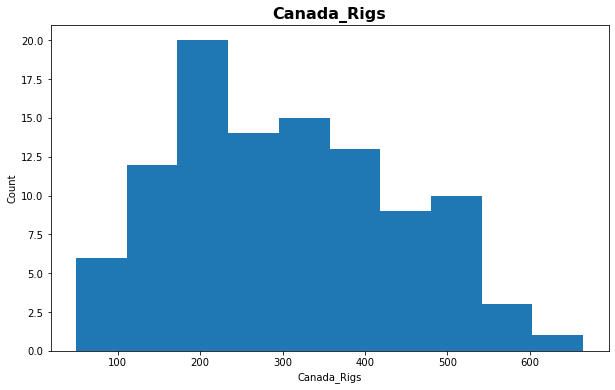

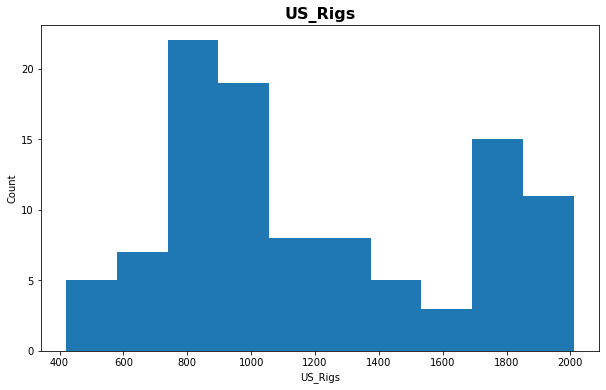

In [7]:
for col in oil_df.columns:
    plt.figure(figsize=(10,6))
    plt.hist(oil_df[col])
    plt.title(col, fontsize=16, fontweight="bold")
    plt.ylabel("Count")
    plt.xlabel(col)
    plt.show()

# Data Cleaning

In [8]:
#One Hot Encoding
dummies = pd.get_dummies(oil_df.Quarter)
oil_encode_df = pd.concat([oil_df, dummies], axis='columns')
oil_encode_df.head()

,Year,Quarter,Canada_D,Europe_D,Japan_D,US_D,China_D,Soviet_D,Asia_D,Other_D,Total_World_D,Canada_S,Mexico_S,North_Sea_S,Other_S,US_S,China_S,Soviet_S,Other_S.1,OPEC_S,Total_World_S,OPEC_Crude_Oil_Portion,OPEC_Non_Crude_Portion,Total_OPEC,Brent_Crude_Price,Latin_America_Rigs,Europe_Rigs,Africa_Rigs,Middle_East_Rigs,Asia_Pacific_Rigs,Total_Intl_Rigs,Canada_Rigs,US_Rigs,Q1,Q2,Q3,Q4
0,2019,Q3,2.57,15.44,3.43,20.88,14.37,5.58,13.74,26.24,102.25,5.47,1.93,2.96,4.64,19.45,4.89,14.58,15.33,33.88,100.17,28.65,5.24,33.88,61.95,195,190,114,422,224,1144,132,920,0,0,1,0
1,2019,Q2,2.32,14.95,3.39,20.63,14.65,5.19,14.11,25.77,101.00,5.47,1.91,2.96,4.59,19.35,4.92,14.43,14.88,34.91,100.49,29.48,5.44,34.91,69.04,186,159,122,412,230,1109,83,989,0,1,0,0
2,2019,Q1,2.31,14.82,4.06,20.55,14.46,5.15,13.95,25.22,100.49,5.43,1.91,2.96,4.85,18.86,4.89,14.86,14.12,35.39,100.34,29.95,5.44,35.39,63.10,188,92,116,398,235,1030,186,1046,1,0,0,0
3,2018,Q4,2.58,14.93,3.89,20.75,14.10,5.36,13.82,25.29,100.73,5.62,1.95,2.95,4.89,19.03,4.81,14.88,14.49,36.74,102.42,31.42,5.32,36.74,68.76,193,90,106,397,225,1011,177,1072,0,0,0,1
4,2018,Q3,2.65,15.47,3.53,20.86,13.88,5.50,13.48,25.88,101.25,5.41,2.09,2.84,4.65,18.44,4.73,14.63,14.81,36.81,101.57,31.50,5.32,36.81,75.07,191,84,104,399,225,1003,208,1051,0,0,1,0


In [9]:
#Scaling
from sklearn.preprocessing import MinMaxScaler
x_scaler = MinMaxScaler()
features = oil_encode_df.drop(["US_Rigs", "Quarter"], axis=1)
x_scaler.fit(features)
features_scaled = x_scaler.transform(features)
df_scaled = pd.DataFrame(features_scaled, columns=features.columns)
df_scaled["US_Rigs"] = oil_encode_df["US_Rigs"]
df_scaled.head()

,Year,Canada_D,Europe_D,Japan_D,US_D,China_D,Soviet_D,Asia_D,Other_D,Total_World_D,Canada_S,Mexico_S,North_Sea_S,Other_S,US_S,China_S,Soviet_S,Other_S.1,OPEC_S,Total_World_S,OPEC_Crude_Oil_Portion,OPEC_Non_Crude_Portion,Total_OPEC,Brent_Crude_Price,Latin_America_Rigs,Europe_Rigs,Africa_Rigs,Middle_East_Rigs,Asia_Pacific_Rigs,Total_Intl_Rigs,Canada_Rigs,Q1,Q2,Q3,Q4,US_Rigs
0,1.00,0.915789,0.563333,0.013158,0.878187,0.975904,1.000000,0.957955,1.000000,1.000000,0.955224,0.010050,0.063131,0.877049,1.000000,0.859649,0.961881,1.000000,0.598746,0.934498,0.453149,0.722105,0.598746,0.461315,0.058140,1.000000,0.733333,1.000000,0.641892,0.739464,0.134740,0.0,0.0,1.0,0.0,920
1,1.00,0.652632,0.400000,0.000000,0.807365,1.000000,0.821918,1.000000,0.959552,0.964367,0.955224,0.000000,0.063131,0.863388,0.991460,0.872807,0.942821,0.938356,0.706374,0.943814,0.580645,0.764211,0.706374,0.525775,0.023256,0.759690,0.809524,0.967742,0.682432,0.694764,0.055195,0.0,1.0,0.0,0.0,989
2,1.00,0.642105,0.356667,0.220395,0.784703,0.983649,0.803653,0.981818,0.912220,0.949829,0.943284,0.000000,0.063131,0.934426,0.949616,0.859649,0.997459,0.834247,0.756531,0.939447,0.652842,0.764211,0.756531,0.471770,0.031008,0.240310,0.752381,0.922581,0.716216,0.593870,0.222403,1.0,0.0,0.0,0.0,1046
3,0.96,0.926316,0.393333,0.164474,0.841360,0.952668,0.899543,0.967045,0.918244,0.956670,1.000000,0.020101,0.060606,0.945355,0.964133,0.824561,1.000000,0.884932,0.897597,1.000000,0.878648,0.738947,0.897597,0.523229,0.050388,0.224806,0.657143,0.919355,0.648649,0.569604,0.207792,0.0,0.0,0.0,1.0,1072
4,0.96,1.000000,0.573333,0.046053,0.872521,0.933735,0.963470,0.928409,0.969019,0.971494,0.937313,0.090452,0.032828,0.879781,0.913749,0.789474,0.968234,0.928767,0.904911,0.975255,0.890937,0.738947,0.904911,0.580598,0.042636,0.178295,0.638095,0.925806,0.648649,0.559387,0.258117,0.0,0.0,1.0,0.0,1051


# Re-Inspect Data

In [10]:
oil_encode_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    103 non-null    int64  
 1   Quarter                 103 non-null    object 
 2   Canada_D                103 non-null    float64
 3   Europe_D                103 non-null    float64
 4   Japan_D                 103 non-null    float64
 5   US_D                    103 non-null    float64
 6   China_D                 103 non-null    float64
 7   Soviet_D                103 non-null    float64
 8   Asia_D                  103 non-null    float64
 9   Other_D                 103 non-null    float64
 10  Total_World_D           103 non-null    float64
 11  Canada_S                103 non-null    float64
 12  Mexico_S                103 non-null    float64
 13  North_Sea_S             103 non-null    float64
 14  Other_S                 103 non-null    fl

In [11]:
oil_encode_df.describe()

,Year,Canada_D,Europe_D,Japan_D,US_D,China_D,Soviet_D,Asia_D,Other_D,Total_World_D,Canada_S,Mexico_S,North_Sea_S,Other_S,US_S,China_S,Soviet_S,Other_S.1,OPEC_S,Total_World_S,OPEC_Crude_Oil_Portion,OPEC_Non_Crude_Portion,Total_OPEC,Brent_Crude_Price,Latin_America_Rigs,Europe_Rigs,Africa_Rigs,Middle_East_Rigs,Asia_Pacific_Rigs,Total_Intl_Rigs,Canada_Rigs,US_Rigs,Q1,Q2,Q3,Q4
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.00000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,2006.378641,2.209515,15.511359,4.922330,19.708738,7.89000,4.320485,9.361650,20.525728,84.446990,3.472913,3.136505,4.648738,2.436214,10.820583,3.986214,11.256214,11.658155,33.821650,84.453495,29.471748,4.350971,33.821650,53.548835,293.019417,99.737864,75.271845,259.854369,207.737864,935.737864,306.669903,1190.038835,0.252427,0.252427,0.252427,0.242718
std,7.470355,0.221613,0.759512,0.777944,0.918108,3.57459,0.482691,2.472779,3.671843,9.478345,0.883869,0.512389,1.361103,1.390549,3.050705,0.679246,2.783294,1.918736,2.817496,9.402470,1.750876,1.272196,2.817496,33.082288,79.903003,22.631733,24.813498,98.253514,37.689381,201.976166,138.513989,448.980303,0.436529,0.436529,0.436529,0.430823
min,1994.000000,1.700000,13.750000,3.390000,17.780000,3.03000,3.390000,5.310000,14.620000,67.170000,2.270000,1.910000,2.710000,1.430000,7.740000,2.930000,7.010000,8.030000,28.150000,68.070000,25.700000,1.810000,28.150000,11.210000,180.000000,61.000000,37.000000,112.000000,129.000000,565.000000,49.000000,421.000000,0.000000,0.000000,0.000000,0.000000
25%,2000.000000,2.040000,14.930000,4.325000,19.005000,4.72000,3.950000,7.320000,17.380000,76.790000,2.750000,2.915000,3.170000,1.565000,8.845000,3.380000,8.140000,10.090000,31.330000,76.540000,28.035000,3.255000,31.330000,24.545000,222.500000,82.500000,57.000000,168.500000,178.500000,763.000000,189.500000,832.000000,0.000000,0.000000,0.000000,0.000000
50%,2006.000000,2.250000,15.580000,4.960000,19.650000,7.28000,4.230000,9.000000,20.100000,84.720000,3.290000,3.180000,4.720000,1.650000,9.390000,3.880000,12.450000,12.120000,34.510000,84.430000,29.860000,4.230000,34.510000,49.550000,280.000000,94.000000,68.000000,250.000000,211.000000,936.000000,291.000000,1046.000000,0.000000,0.000000,0.000000,0.000000
75%,2013.000000,2.385000,16.150000,5.435000,20.360000,10.86000,4.695000,11.535000,24.530000,91.635000,4.010000,3.550000,6.010000,4.335000,11.910000,4.745000,13.705000,12.725000,36.450000,90.985000,30.935000,5.315000,36.450000,74.660000,356.000000,112.000000,84.500000,375.500000,241.000000,1089.000000,406.000000,1701.500000,0.500000,0.500000,0.500000,0.000000
max,2019.000000,2.650000,16.750000,6.430000,21.310000,14.65000,5.580000,14.110000,26.240000,102.250000,5.620000,3.900000,6.670000,5.090000,19.450000,5.210000,14.880000,15.330000,37.720000,102.420000,32.210000,6.560000,37.720000,121.200000,438.000000,190.000000,142.000000,422.000000,277.000000,1348.000000,665.000000,2010.000000,1.000000,1.000000,1.000000,1.000000


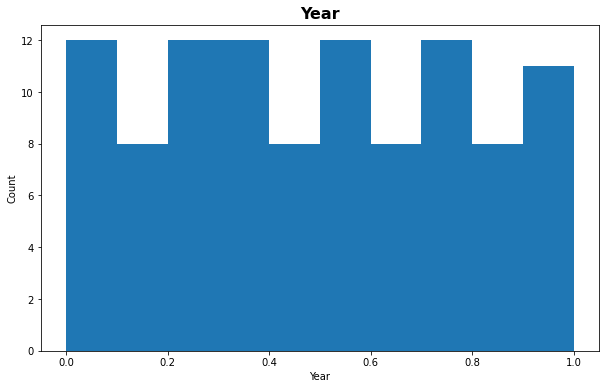

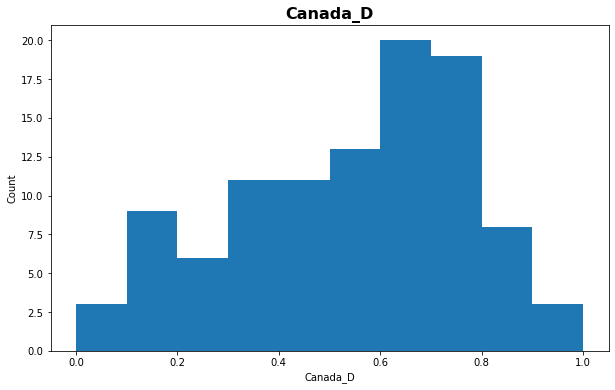

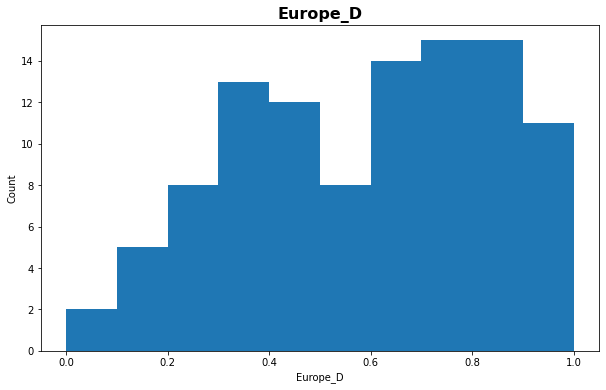

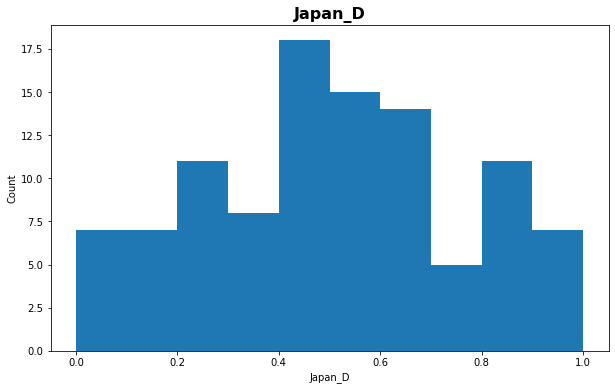

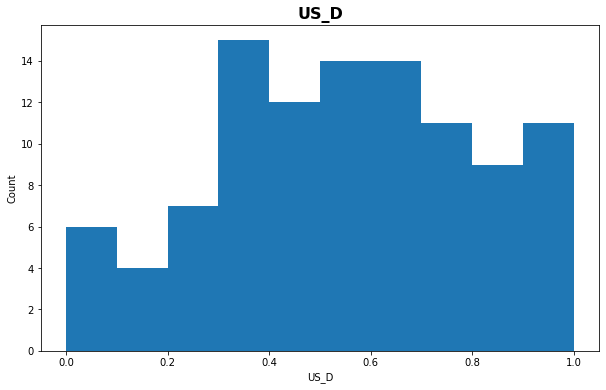

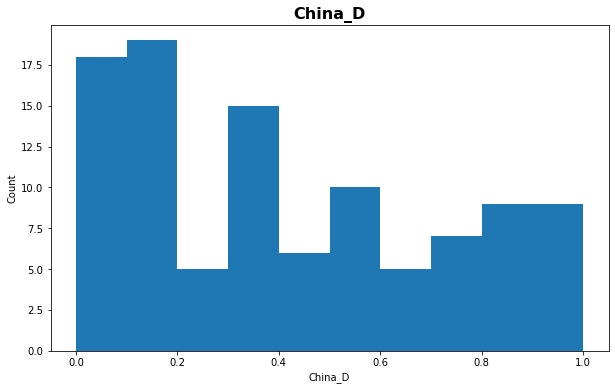

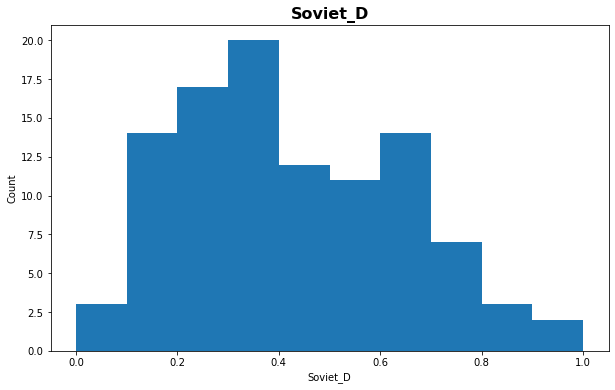

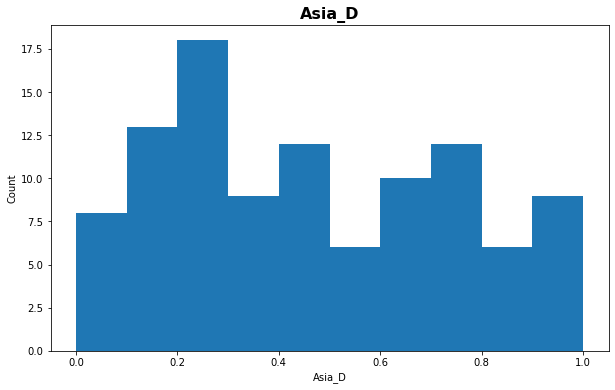

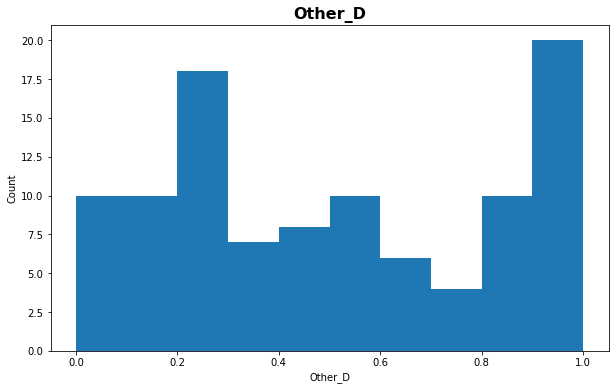

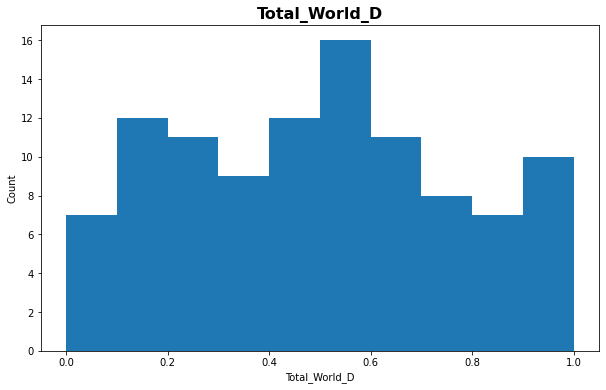

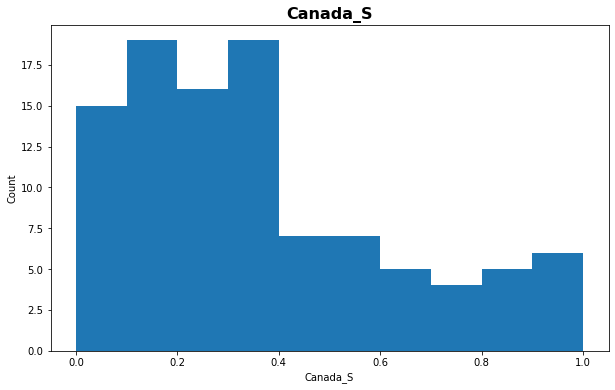

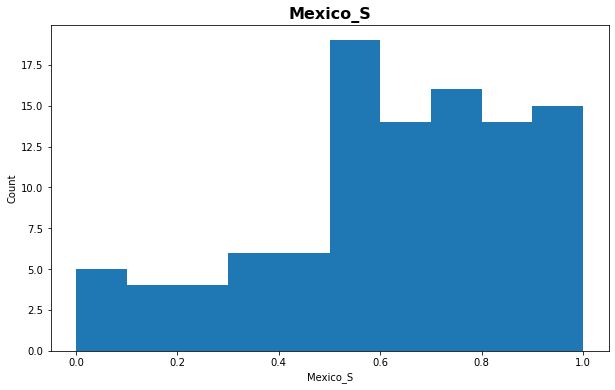

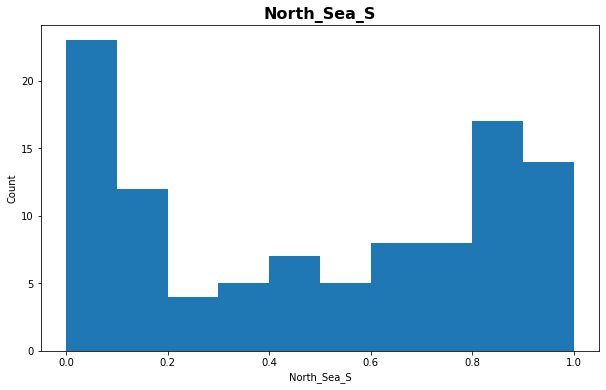

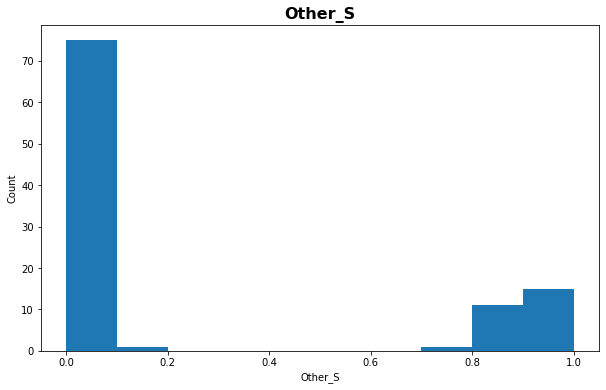

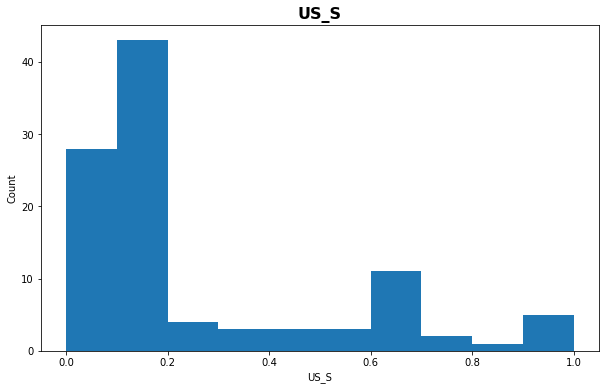

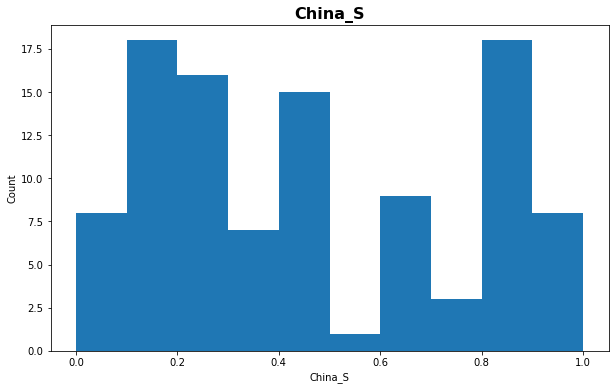

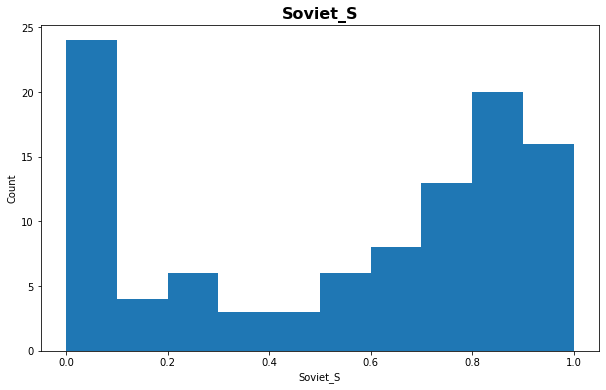

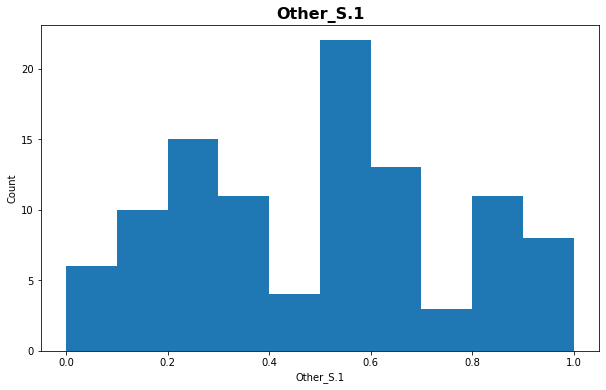

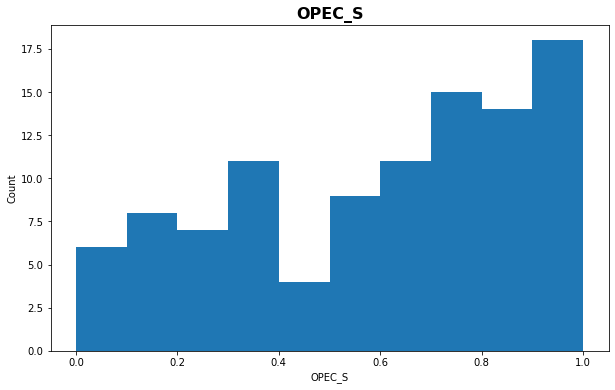

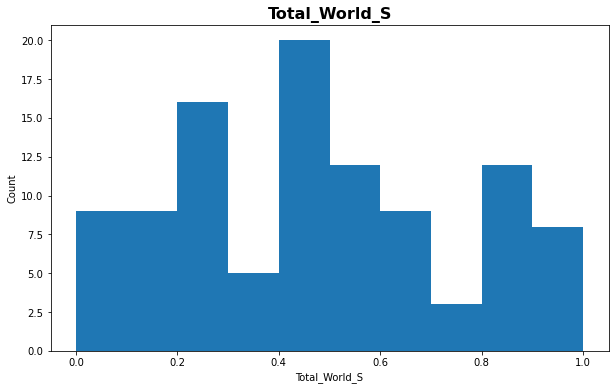

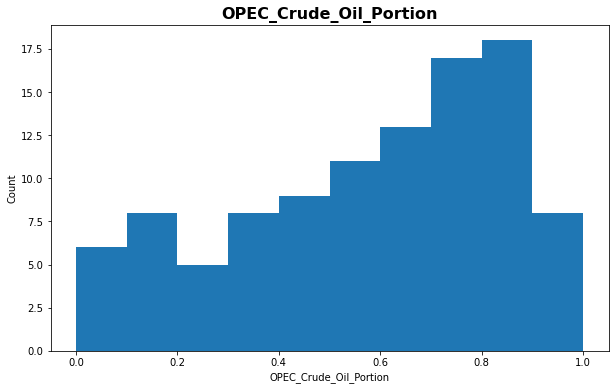

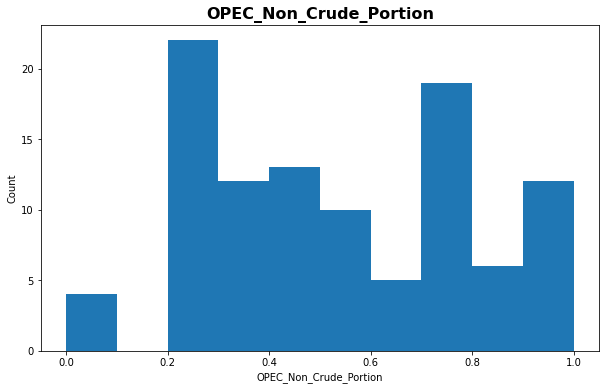

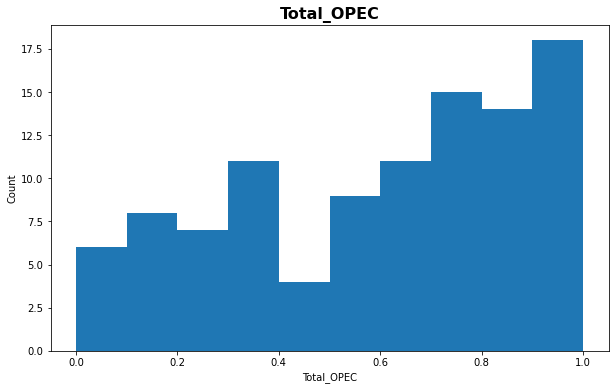

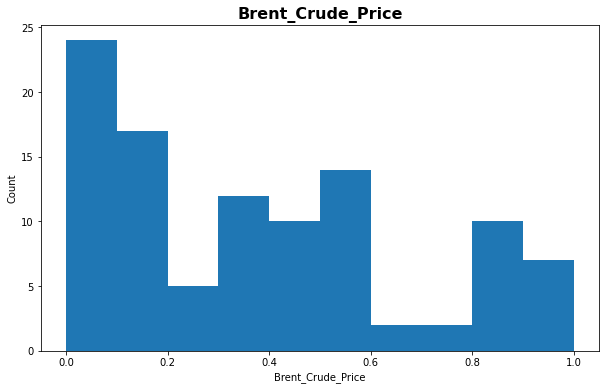

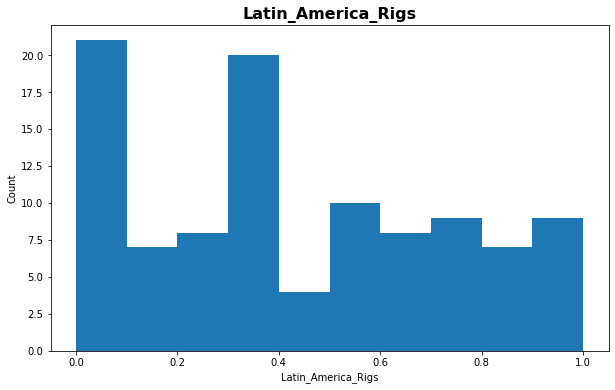

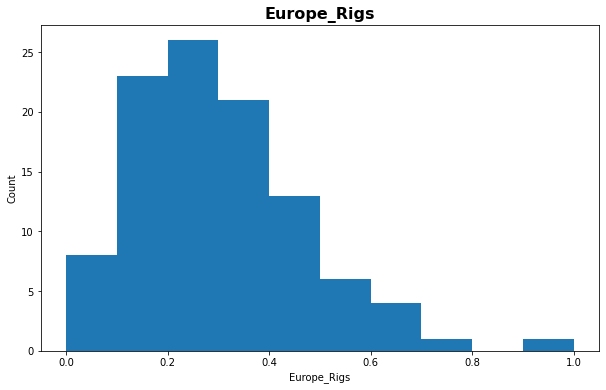

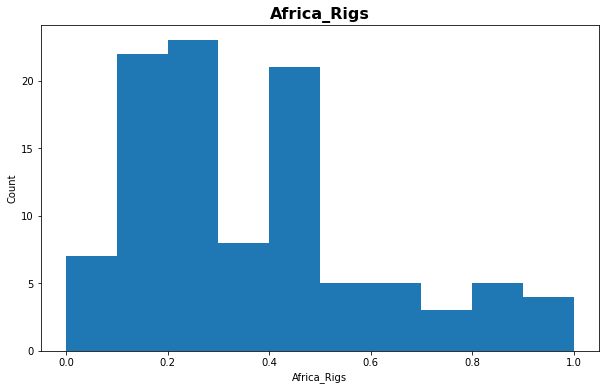

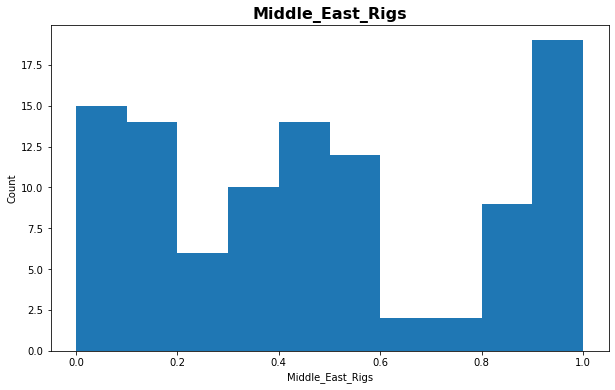

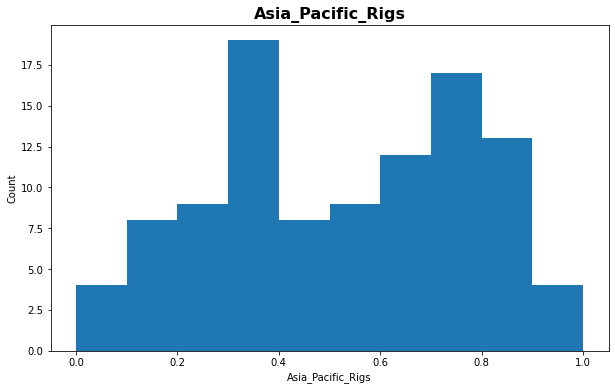

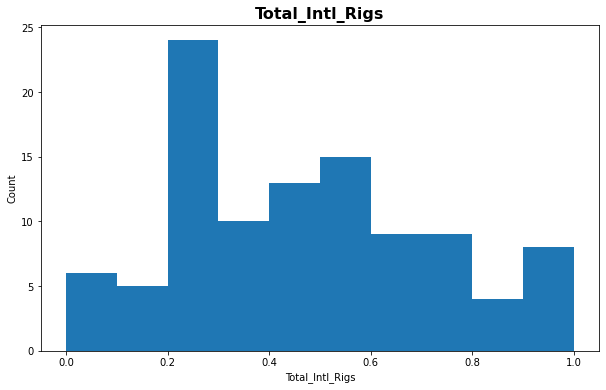

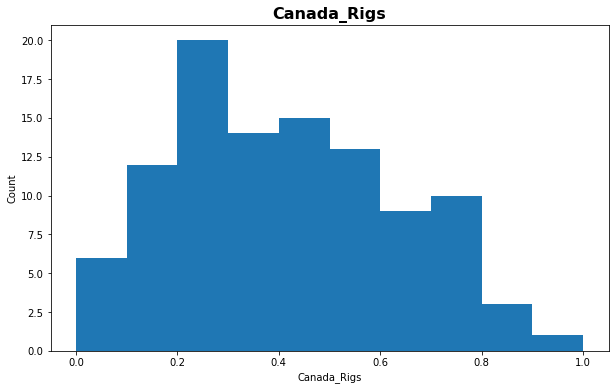

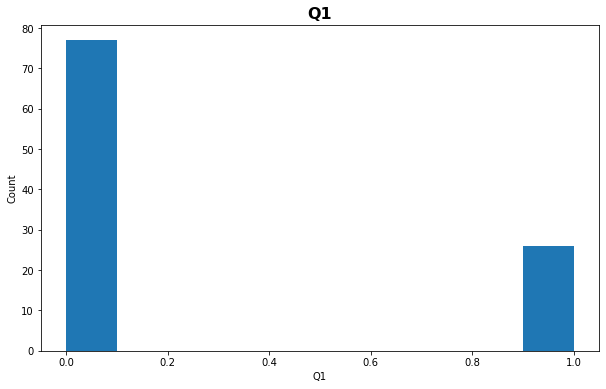

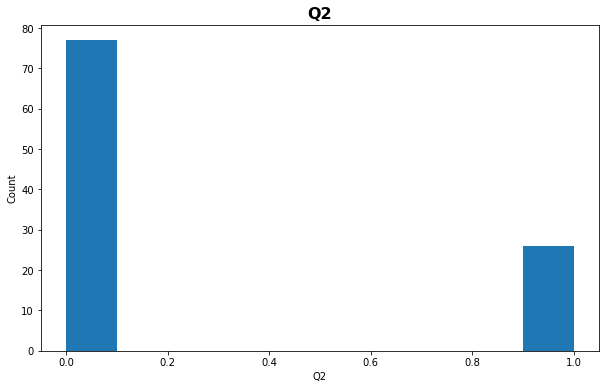

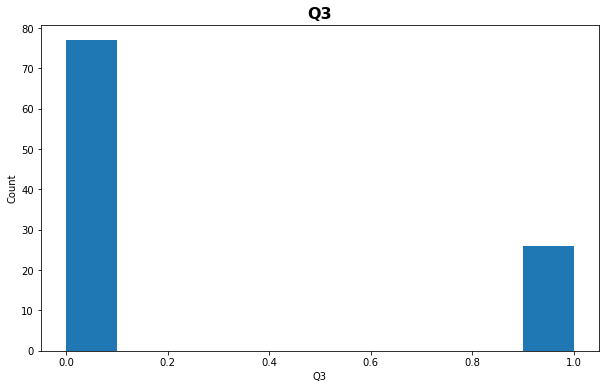

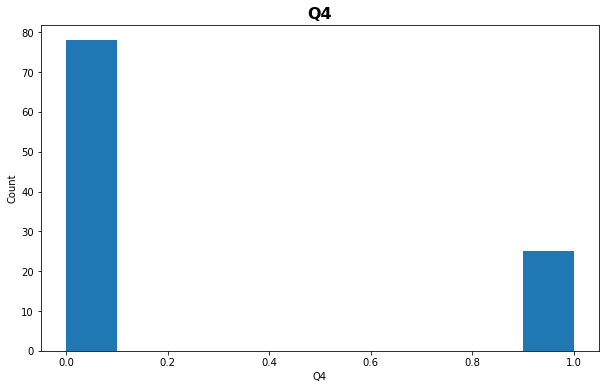

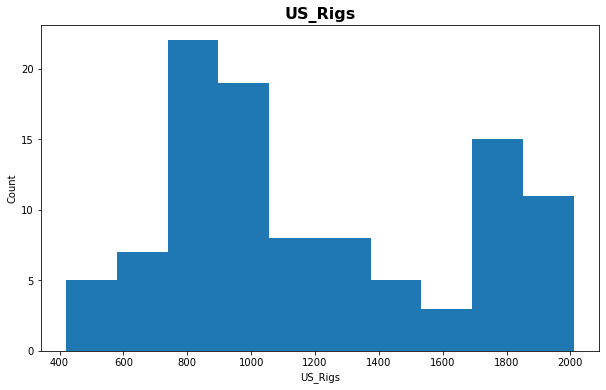

In [12]:
for col in df_scaled.columns:
    plt.figure(figsize=(10,6))
    plt.hist(df_scaled[col])
    plt.title(col, fontsize=16, fontweight="bold")
    plt.ylabel("Count")
    plt.xlabel(col)
    plt.show()

# Correlations

In [13]:
df_scaled.corr()

,Year,Canada_D,Europe_D,Japan_D,US_D,China_D,Soviet_D,Asia_D,Other_D,Total_World_D,Canada_S,Mexico_S,North_Sea_S,Other_S,US_S,China_S,Soviet_S,Other_S.1,OPEC_S,Total_World_S,OPEC_Crude_Oil_Portion,OPEC_Non_Crude_Portion,Total_OPEC,Brent_Crude_Price,Latin_America_Rigs,Europe_Rigs,Africa_Rigs,Middle_East_Rigs,Asia_Pacific_Rigs,Total_Intl_Rigs,Canada_Rigs,Q1,Q2,Q3,Q4,US_Rigs
Year,1.000000,0.909008,-0.522960,-0.820549,0.348996,0.984851,0.616399,0.990169,0.984206,0.987982,0.944096,-0.719988,-0.915799,0.749815,0.761612,0.966591,0.965887,0.951164,0.897334,0.985839,0.790864,0.899389,0.897334,0.701418,0.206577,0.220775,0.622849,0.968822,0.597290,0.765344,-0.143097,0.009486,0.009486,0.009486,-0.028835,0.362336
Canada_D,0.909008,1.000000,-0.299382,-0.662703,0.552729,0.874385,0.485933,0.882492,0.892460,0.928782,0.850360,-0.488811,-0.784511,0.635573,0.606563,0.878817,0.913448,0.887027,0.901250,0.922704,0.839880,0.840657,0.901250,0.650201,0.228600,0.066670,0.484247,0.894337,0.523688,0.689725,0.057356,-0.032164,-0.163909,0.119849,0.077233,0.416113
Europe_D,-0.522960,-0.299382,1.000000,0.554624,0.457901,-0.580726,-0.559933,-0.562706,-0.588676,-0.459120,-0.516944,0.661944,0.698838,-0.621498,-0.596315,-0.632097,-0.459664,-0.346807,-0.406091,-0.483297,-0.218222,-0.598451,-0.406091,-0.456668,-0.268380,-0.619564,-0.747257,-0.587013,-0.386136,-0.625011,0.301075,-0.024701,-0.220455,0.093579,0.153584,-0.134892
Japan_D,-0.820549,-0.662703,0.554624,1.000000,-0.168061,-0.833421,-0.561775,-0.816028,-0.820888,-0.778873,-0.769055,0.708338,0.828221,-0.656677,-0.696335,-0.797577,-0.773252,-0.810770,-0.684348,-0.800608,-0.583024,-0.713872,-0.684348,-0.549410,-0.122851,-0.266265,-0.545830,-0.796995,-0.498792,-0.626051,0.518973,0.408486,-0.336346,-0.226642,0.156548,-0.215655
US_D,0.348996,0.552729,0.457901,-0.168061,1.000000,0.280759,-0.067844,0.305043,0.248306,0.410798,0.334479,0.142114,-0.059626,0.103851,0.102935,0.226828,0.387663,0.446996,0.381784,0.399098,0.488454,0.173939,0.381784,0.097291,-0.182518,-0.508628,-0.218743,0.275431,0.031131,-0.016703,0.148394,-0.059129,-0.077720,0.078592,0.059029,0.158631
China_D,0.984851,0.874385,-0.580726,-0.833421,0.280759,1.000000,0.691004,0.991799,0.981626,0.983801,0.966571,-0.801119,-0.927492,0.822396,0.840885,0.968907,0.930050,0.934711,0.860581,0.983648,0.757119,0.864428,0.860581,0.646563,0.131627,0.281854,0.677090,0.969655,0.556541,0.742108,-0.216252,-0.023938,0.012817,0.013194,-0.002101,0.271243
Soviet_D,0.616399,0.485933,-0.559933,-0.561775,-0.067844,0.691004,1.000000,0.652455,0.656285,0.649511,0.713934,-0.785573,-0.733196,0.663318,0.766884,0.626104,0.580678,0.550727,0.455957,0.636439,0.362488,0.510813,0.455957,0.440618,0.046179,0.464992,0.647883,0.673030,0.477584,0.566586,-0.214270,-0.060609,-0.085269,0.074789,0.072030,0.138671
Asia_D,0.990169,0.882492,-0.562706,-0.816028,0.305043,0.991799,0.652455,1.000000,0.978987,0.985288,0.959176,-0.776436,-0.910893,0.784661,0.817098,0.961196,0.935536,0.935862,0.871762,0.983261,0.760578,0.884420,0.871762,0.672865,0.149313,0.257444,0.656378,0.961760,0.553481,0.739321,-0.189764,0.004878,0.027039,-0.028182,-0.003785,0.301214
Other_D,0.984206,0.892460,-0.588676,-0.820888,0.248306,0.981626,0.656285,0.978987,1.000000,0.976538,0.929760,-0.745088,-0.944156,0.780726,0.773292,0.984259,0.944160,0.921211,0.903360,0.973882,0.784981,0.920770,0.903360,0.727985,0.262364,0.319215,0.697422,0.980437,0.604000,0.814590,-0.151126,-0.035714,-0.004153,0.042271,-0.002437,0.383029
Total_World_D,0.987982,0.928782,-0.459120,-0.778873,0.410798,0.983801,0.649511,0.985288,0.976538,1.000000,0.958826,-0.719732,-0.890358,0.772075,0.787941,0.955495,0.948514,0.951124,0.894195,0.992716,0.807848,0.869109,0.894195,0.666511,0.148500,0.201439,0.614955,0.965542,0.555719,0.729915,-0.118111,0.000422,-0.050806,0.017056,0.033769,0.332666


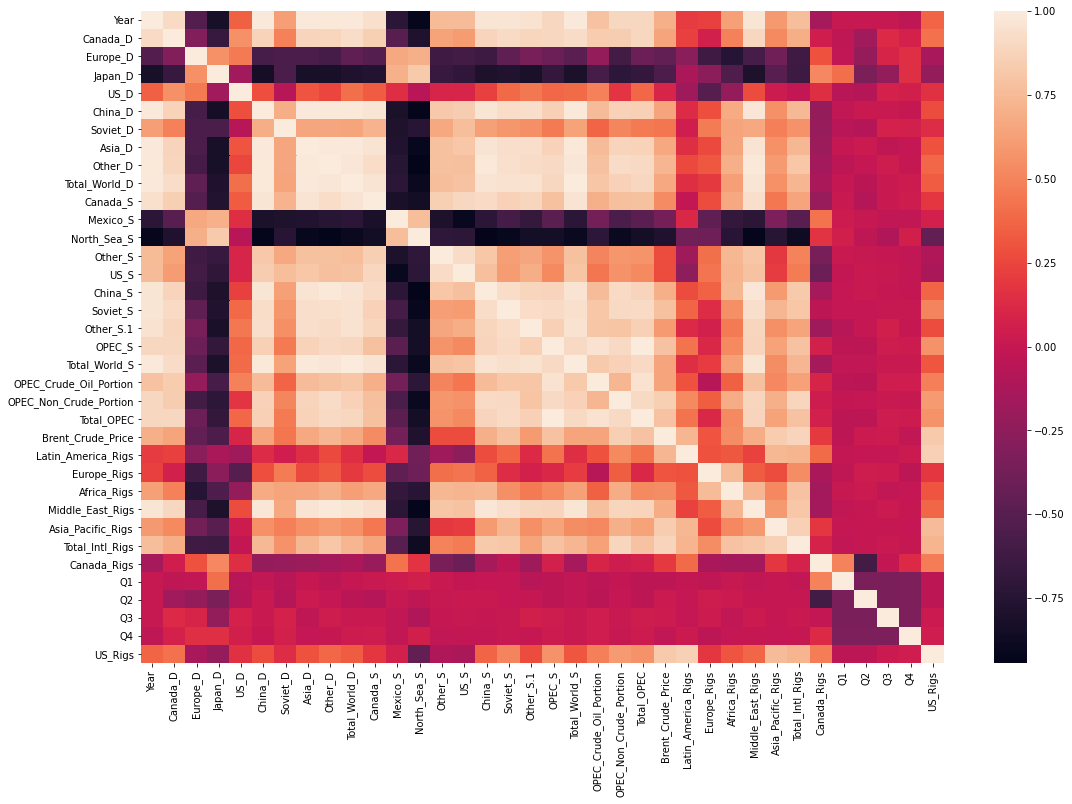

In [14]:
plt.figure(figsize=(18,12))
sns.heatmap(df_scaled.corr())
plt.show()

# Prep for Machine Learning Analysis

In [253]:
#Get Highly Correlated Features
corrs = abs(df_scaled.corr()["US_Rigs"]).sort_values()

predictive_cols = []
for name, col in corrs.iteritems():
    if col > .2:
        predictive_cols.append(name)
        
predictive_cols

['Japan_D',
 'China_D',
 'Other_S.1',
 'Asia_D',
 'Africa_Rigs',
 'Total_World_S',
 'Total_World_D',
 'Year',
 'China_S',
 'Middle_East_Rigs',
 'Other_D',
 'Canada_D',
 'North_Sea_S',
 'Canada_Rigs',
 'OPEC_Crude_Oil_Portion',
 'Soviet_S',
 'Total_OPEC',
 'OPEC_S',
 'OPEC_Non_Crude_Portion',
 'Total_Intl_Rigs',
 'Asia_Pacific_Rigs',
 'Brent_Crude_Price',
 'Latin_America_Rigs',
 'US_Rigs']

In [254]:
#Create our feature and target sets
feature_cols = ['Japan_D',
 'China_D',
 'Other_S.1',
 'Asia_D',
 'Africa_Rigs',
 'Total_World_S',
 'Total_World_D',
 'Year',
 'China_S',
 'Middle_East_Rigs',
 'Other_D',
 'Canada_D',
 'North_Sea_S',
 'Canada_Rigs',
 'OPEC_Crude_Oil_Portion',
 'Soviet_S',
 'Total_OPEC',
 'OPEC_S',
 'OPEC_Non_Crude_Portion',
 'Total_Intl_Rigs',
 'Asia_Pacific_Rigs',
 'Brent_Crude_Price',
 'Latin_America_Rigs']

target_col = "US_Rigs"

features = df_scaled[feature_cols]
target = df_scaled[target_col]

In [255]:
#Train Test Split
from sklearn.model_selection import train_test_split
X = features.to_numpy()
y = target.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Machine Learning

In [256]:
#Imports
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error

# Linear Models

In [257]:
#Initialize Linear Regression Model
reg = LinearRegression()

# fit
reg.fit(X_train, y_train)

# predict
in_preds = reg.predict(X_train)
out_preds = reg.predict(X_test)

#evaluate
print("Model Evaluation Report")
print(f"The In Sample R2 Score: {r2_score(y_train, in_preds)}")
print(f"The In Sample MSE: {mean_squared_error(y_train, in_preds)}")
print()
print(f"The Out Sample R2 Score: {r2_score(y_test, out_preds)}")
print(f"The Out Sample MSE: {mean_squared_error(y_test, out_preds)}")

Model Evaluation Report
The In Sample R2 Score: 0.9462556266686242
The In Sample MSE: 10365.436825510018

The Out Sample R2 Score: 0.9032210416082804
The Out Sample MSE: 21874.314622709146


In [258]:
#Initialize Ridge Model
ridge = Ridge()

# fit
ridge.fit(X_train, y_train)

# predict
in_preds = ridge.predict(X_train)
out_preds = ridge.predict(X_test)

#evaluate
print("Model Evaluation Report")
print(f"The In Sample R2 Score: {r2_score(y_train, in_preds)}")
print(f"The In Sample MSE: {mean_squared_error(y_train, in_preds)}")
print()
print(f"The Out Sample R2 Score: {r2_score(y_test, out_preds)}")
print(f"The Out Sample MSE: {mean_squared_error(y_test, out_preds)}")

Model Evaluation Report
The In Sample R2 Score: 0.8830263383938839
The In Sample MSE: 22560.186759474913

The Out Sample R2 Score: 0.9084679631820435
The Out Sample MSE: 20688.38727638843


In [259]:
#Initialize Lasso Model
lasso = Lasso()

# fit
lasso.fit(X_train, y_train)

# predict
in_preds = lasso.predict(X_train)
out_preds = lasso.predict(X_test)

#evaluate
print("Model Evaluation Report")
print(f"The In Sample R2 Score: {r2_score(y_train, in_preds)}")
print(f"The In Sample MSE: {mean_squared_error(y_train, in_preds)}")
print()
print(f"The Out Sample R2 Score: {r2_score(y_test, out_preds)}")
print(f"The Out Sample MSE: {mean_squared_error(y_test, out_preds)}")

Model Evaluation Report
The In Sample R2 Score: 0.9039738108514704
The In Sample MSE: 18520.141468139005

The Out Sample R2 Score: 0.9221678285638026
The Out Sample MSE: 17591.89635905076


In [260]:
#Initialize ElasticNet Model
en = ElasticNet()

# fit
en.fit(X_train, y_train)

# predict
in_preds = en.predict(X_train)
out_preds = en.predict(X_test)

#evaluate
print("Model Evaluation Report")
print(f"The In Sample R2 Score: {r2_score(y_train, in_preds)}")
print(f"The In Sample MSE: {mean_squared_error(y_train, in_preds)}")
print()
print(f"The Out Sample R2 Score: {r2_score(y_test, out_preds)}")
print(f"The Out Sample MSE: {mean_squared_error(y_test, out_preds)}")

Model Evaluation Report
The In Sample R2 Score: 0.5024042690580299
The In Sample MSE: 95969.06232249911

The Out Sample R2 Score: 0.49428109182732094
The Out Sample MSE: 114304.3352796471


# Tree Models

In [261]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn import svm
from sklearn.metrics import mean_squared_error 

Model Evaluation Report
The In Sample R2 Score: 1.0
The In Sample RMSE: 0.0

The Out Sample R2 Score: 0.8056303710336727
The Out Sample MSE: 43932.09523809524


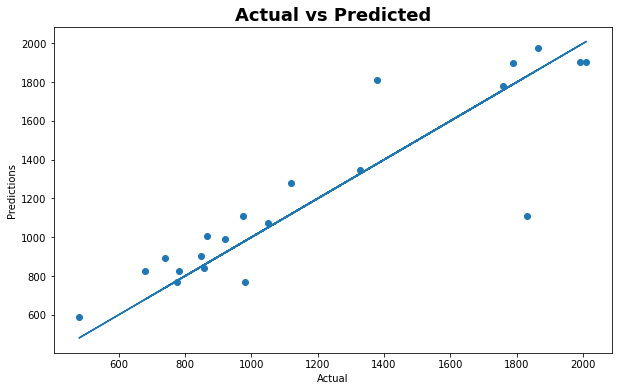

In [262]:
#Initialize Decision Tree Model
dt = DecisionTreeRegressor()

# fit
dt.fit(X_train, y_train)

# predict
in_preds = dt.predict(X_train)
out_preds = dt.predict(X_test)

#evaluate
print("Model Evaluation Report")
print(f"The In Sample R2 Score: {r2_score(y_train, in_preds)}")
print(f"The In Sample RMSE: {np.sqrt(mean_squared_error(y_train, in_preds))}")
print()
print(f"The Out Sample R2 Score: {r2_score(y_test, out_preds)}")
print(f"The Out Sample MSE: {mean_squared_error(y_test, out_preds)}")

# make Plot
plt.figure(figsize=(10,6))
plt.scatter(y_test, out_preds)
plt.plot(y_test, y_test)
plt.xlabel("Actual")
plt.ylabel("Predictions")
plt.title("Actual vs Predicted", fontsize=18, fontweight="bold")
plt.show()

Model Evaluation Report
The In Sample R2 Score: 0.9759615376979474
The In Sample RMSE: 68.08957830072626

The Out Sample R2 Score: 0.9141684236582754
The Out Sample MSE: 19399.949500000006


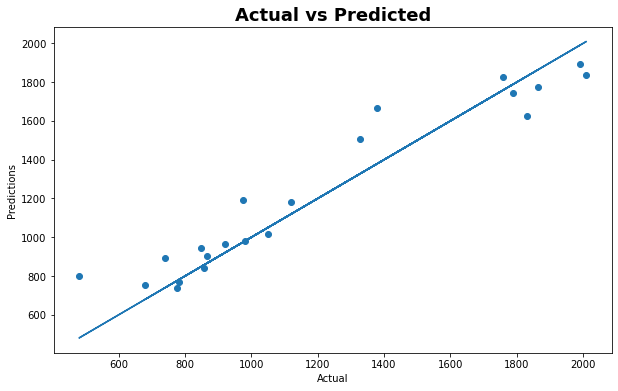

In [263]:
#Initialize Random Forest Model
rf = RandomForestRegressor()

# fit
rf.fit(X_train, y_train)

# predict
in_preds = rf.predict(X_train)
out_preds = rf.predict(X_test)

#evaluate
print("Model Evaluation Report")
print(f"The In Sample R2 Score: {r2_score(y_train, in_preds)}")
print(f"The In Sample RMSE: {np.sqrt(mean_squared_error(y_train, in_preds))}")
print()
print(f"The Out Sample R2 Score: {r2_score(y_test, out_preds)}")
print(f"The Out Sample MSE: {mean_squared_error(y_test, out_preds)}")

# make Plot
plt.figure(figsize=(10,6))
plt.scatter(y_test, out_preds)
plt.plot(y_test, y_test)
plt.xlabel("Actual")
plt.ylabel("Predictions")
plt.title("Actual vs Predicted", fontsize=18, fontweight="bold")
plt.show()

Model Evaluation Report
The In Sample R2 Score: 0.9765050198559061
The In Sample RMSE: 67.31546405523041

The Out Sample R2 Score: 0.9259537526383375
The Out Sample MSE: 16736.18871639494


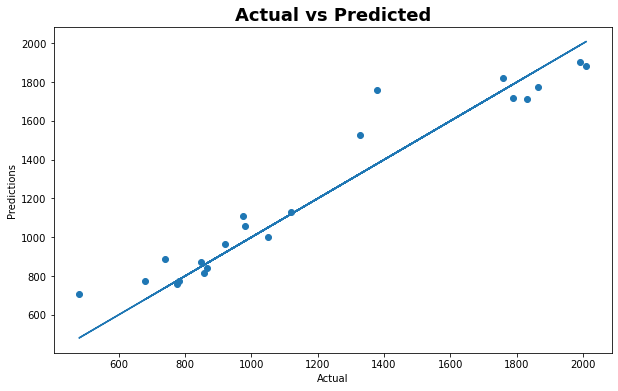

In [264]:
#Initialize Ada Boost Model
ada = AdaBoostRegressor()

# fit
ada.fit(X_train, y_train)

# predict
in_preds = ada.predict(X_train)
out_preds = ada.predict(X_test)

#evaluate
print("Model Evaluation Report")
print(f"The In Sample R2 Score: {r2_score(y_train, in_preds)}")
print(f"The In Sample RMSE: {np.sqrt(mean_squared_error(y_train, in_preds))}")
print()
print(f"The Out Sample R2 Score: {r2_score(y_test, out_preds)}")
print(f"The Out Sample MSE: {mean_squared_error(y_test, out_preds)}")

# make Plot
plt.figure(figsize=(10,6))
plt.scatter(y_test, out_preds)
plt.plot(y_test, y_test)
plt.xlabel("Actual")
plt.ylabel("Predictions")
plt.title("Actual vs Predicted", fontsize=18, fontweight="bold")
plt.show()

Model Evaluation Report
The In Sample R2 Score: 0.9996835658256225
The In Sample RMSE: 7.812121571437731

The Out Sample R2 Score: 0.8863249568575249
The Out Sample MSE: 25693.226087265753


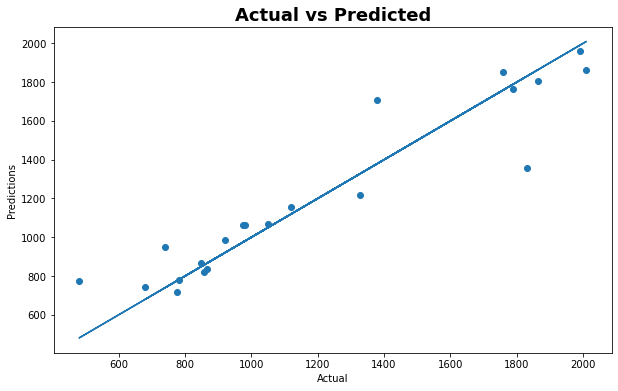

In [265]:
#Initialize Gradient Boost Model
gb = GradientBoostingRegressor()

# fit
gb.fit(X_train, y_train)

# predict
in_preds = gb.predict(X_train)
out_preds = gb.predict(X_test)

#evaluate
print("Model Evaluation Report")
print(f"The In Sample R2 Score: {r2_score(y_train, in_preds)}")
print(f"The In Sample RMSE: {np.sqrt(mean_squared_error(y_train, in_preds))}")
print()
print(f"The Out Sample R2 Score: {r2_score(y_test, out_preds)}")
print(f"The Out Sample MSE: {mean_squared_error(y_test, out_preds)}")

# make Plot
plt.figure(figsize=(10,6))
plt.scatter(y_test, out_preds)
plt.plot(y_test, y_test)
plt.xlabel("Actual")
plt.ylabel("Predictions")
plt.title("Actual vs Predicted", fontsize=18, fontweight="bold")
plt.show()

# KNN Model

In [266]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = mean_squared_error(y_test,pred) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('MSE value for k= ' , K , 'is:', error)
    print(f"The Out Sample R2 Score: {r2_score(y_test, pred)}")

MSE value for k=  1 is: 46345.95238095238
The Out Sample R2 Score: 0.794950695623427
MSE value for k=  2 is: 21944.79761904762
The Out Sample R2 Score: 0.9029092023078215
MSE value for k=  3 is: 26061.21164021163
The Out Sample R2 Score: 0.8846968711720272
MSE value for k=  4 is: 26638.57738095238
The Out Sample R2 Score: 0.8821424206228913
MSE value for k=  5 is: 29528.120000000006
The Out Sample R2 Score: 0.8693581606484282
MSE value for k=  6 is: 30094.050264550267
The Out Sample R2 Score: 0.8668543043004601
MSE value for k=  7 is: 29499.90962099125
The Out Sample R2 Score: 0.8694829723805165
MSE value for k=  8 is: 33015.46577380953
The Out Sample R2 Score: 0.8539290284738975
MSE value for k=  9 is: 36178.13462669017
The Out Sample R2 Score: 0.8399363707564318
MSE value for k=  10 is: 33694.27238095239
The Out Sample R2 Score: 0.8509257711137559
MSE value for k=  11 is: 33992.221959858325
The Out Sample R2 Score: 0.8496075469592111
MSE value for k=  12 is: 37818.203042328045
The Ou

<AxesSubplot:>

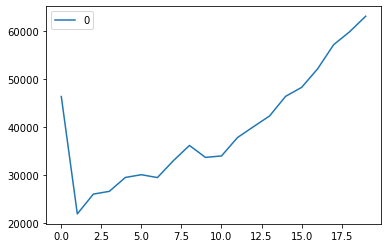

In [267]:
#elbow curve 
curve = pd.DataFrame(rmse_val)
curve.plot()

# SVM Model

Model Evaluation Report
The In Sample R2 Score: -0.04059079264666576
The In Sample RMSE: 447.98894009454716

The Out Sample R2 Score: -0.03281008951869091
The Out Sample MSE: 233439.3055998545


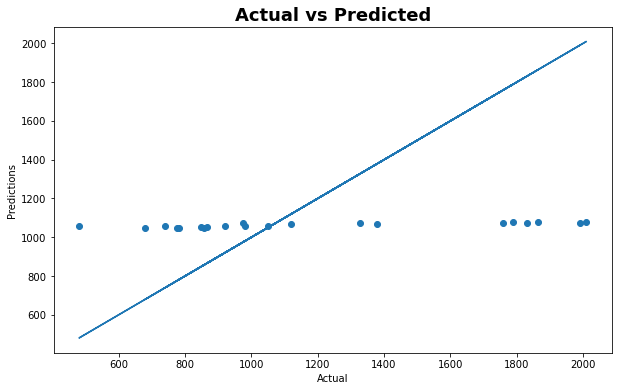

In [268]:
#Initialize SVM Model
from sklearn import svm
svm = svm.SVR()

# fit
svm.fit(X_train, y_train)

# predict
in_preds = svm.predict(X_train)
out_preds = svm.predict(X_test)

#evaluate
print("Model Evaluation Report")
print(f"The In Sample R2 Score: {r2_score(y_train, in_preds)}")
print(f"The In Sample RMSE: {np.sqrt(mean_squared_error(y_train, in_preds))}")
print()
print(f"The Out Sample R2 Score: {r2_score(y_test, out_preds)}")
print(f"The Out Sample MSE: {mean_squared_error(y_test, out_preds)}")

# make Plot
plt.figure(figsize=(10,6))
plt.scatter(y_test, out_preds)
plt.plot(y_test, y_test)
plt.xlabel("Actual")
plt.ylabel("Predictions")
plt.title("Actual vs Predicted", fontsize=18, fontweight="bold")
plt.show()

# Model Selection

In [269]:
# We chose the Lasso Model because it had one of the highest combinations of a high r2 score and low MSE score

In [280]:
#initialize
lasso_final = Lasso()

# fit
lasso_final.fit(X, y)

# predict
in_preds = lasso_final.predict(X)

#evaluate
print("Model Evaluation Report")
print(f"The In Sample R2 Score: {r2_score(y, in_preds)}")
print(f"The In Sample MSE: {mean_squared_error(y, in_preds)}")
print()
print(f"The FINAL equation: Rig Count = ({lasso_final.coef_[0]}*{feature_cols[0]}) + \
                                        ({lasso_final.coef_[1]}*{feature_cols[1]}) + \
                                        ({lasso_final.coef_[8]}*{feature_cols[8]}) + \
                                        ({lasso_final.coef_[9]}*{feature_cols[9]}) + \
                                        ({lasso_final.coef_[11]}*{feature_cols[11]})+ \
                                        ({lasso_final.coef_[12]}*{feature_cols[12]})+ \
                                        ({lasso_final.coef_[13]}*{feature_cols[13]})+ \
                                        ({lasso_final.coef_[14]}*{feature_cols[14]})+ \
                                        ({lasso_final.coef_[19]}*{feature_cols[19]})+ \
                                        ({lasso_final.coef_[20]}*{feature_cols[20]})+ \
                                        ({lasso_final.coef_[21]}*{feature_cols[21]})+ \
                                        ({lasso_final.coef_[22]}*{feature_cols[22]})+ \
                                        {lasso_final.intercept_}")

Model Evaluation Report
The In Sample R2 Score: 0.9086970249228878
The In Sample MSE: 18226.46529377772

The FINAL equation: Rig Count = (-261.75644027582786*Japan_D) +                                         (-83.81716377144141*China_D) +                                         (-434.8033528228403*China_S) +                                         (404.35470725238304*Middle_East_Rigs) +                                         (33.62671216260575*Canada_D)+                                         (479.0083995359546*North_Sea_S)+                                         (352.20365798209025*Canada_Rigs)+                                         (149.87462873563607*OPEC_Crude_Oil_Portion)+                                         (104.81191281829365*Total_Intl_Rigs)+                                         (189.7326619678427*Asia_Pacific_Rigs)+                                         (821.7512484567759*Brent_Crude_Price)+                                         (538.707941387649*Latin_America

In [272]:
lasso_final.coef_.tolist()

[-261.75644027582786,
 -83.81716377144141,
 -0.0,
 -0.0,
 0.0,
 0.0,
 0.0,
 -0.0,
 -434.8033528228403,
 404.35470725238304,
 -0.0,
 33.62671216260575,
 479.0083995359546,
 352.20365798209025,
 149.87462873563607,
 0.0,
 0.0,
 0.0,
 -0.0,
 104.81191281829365,
 189.7326619678427,
 821.7512484567759,
 538.707941387649]

In [282]:
import pickle

In [283]:
# save model to disk
filename = 'finalized_model.sav'
pickle.dump(lasso_final, open(filename, 'wb'))

In [287]:
my_new_model = pickle.load(open(filename, 'rb'))

In [289]:
my_new_model.predict(X_test)

array([2056.82257463,  878.21801012, 1177.01360569, 1693.18664357,
       1347.56466281, 1322.08680594,  956.64955179, 1930.65585697,
        832.35256006,  907.46162004, 1190.86652809, 1946.89910962,
        759.36881966,  895.38628487,  966.10226849, 1072.3581709 ,
        724.69311759, 1817.23128184,  711.14425456, 1876.14171979,
        731.47026681])

In [310]:
final_features_list = [feature_cols[0],\
                       feature_cols[1],\
                       feature_cols[8],\
                       feature_cols[9],\
                       feature_cols[11],\
                       feature_cols[12],\
                       feature_cols[13],\
                       feature_cols[14],\
                       feature_cols[19],\
                       feature_cols[20],\
                       feature_cols[21],\
                       feature_cols[22],\
                      ]
final_features_list

['Japan_D',
 'China_D',
 'China_S',
 'Middle_East_Rigs',
 'Canada_D',
 'North_Sea_S',
 'Canada_Rigs',
 'OPEC_Crude_Oil_Portion',
 'Total_Intl_Rigs',
 'Asia_Pacific_Rigs',
 'Brent_Crude_Price',
 'Latin_America_Rigs']

In [324]:
prediction = my_new_model.predict([[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,16,19,20,21,22,23]])

In [325]:
prediction

array([50235.98210613])